In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv",parse_dates=["date"])
df.set_index('date', inplace=True)

# Muestra las primeras filas del DataFrame
print(df.head())

            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [5]:
df['value'].mean()

67220.68328220859

In [6]:
top_threshold = df['value'].quantile(0.975)
bottom_threshold = df['value'].quantile(0.025)

# Create masks for days exceeding the top threshold or falling below the bottom threshold
mask_top = df['value'] > top_threshold
mask_bottom = df['value'] < bottom_threshold

# Apply masks to filter out the rows
df = df[~(mask_top | mask_bottom)]


In [7]:
def draw_line_plot():
    # Draw line plot, fig is gonna be the png later and ax is like the object itself, the maths to later draw 
    fig, ax = plt.subplots(figsize=(20, 5))
    
    # Plot the data as a line chart
    ax.plot(df.index, df['value'], color='r', linewidth=1, label='Page Views')
    
    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    
    # Format the date ticks on the x-axis
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))  # Show a maximum of 8 ticks on x axis

    plt.xticks(rotation=45) # this rotates 45degrees the labels under the ticks for nicer view
    
    # Add legend (is kinda useless in this case but a good practice)
    ax.legend(loc='upper left')
    
    # Save image and return fig
    fig.savefig('line_plot.png')
    return fig


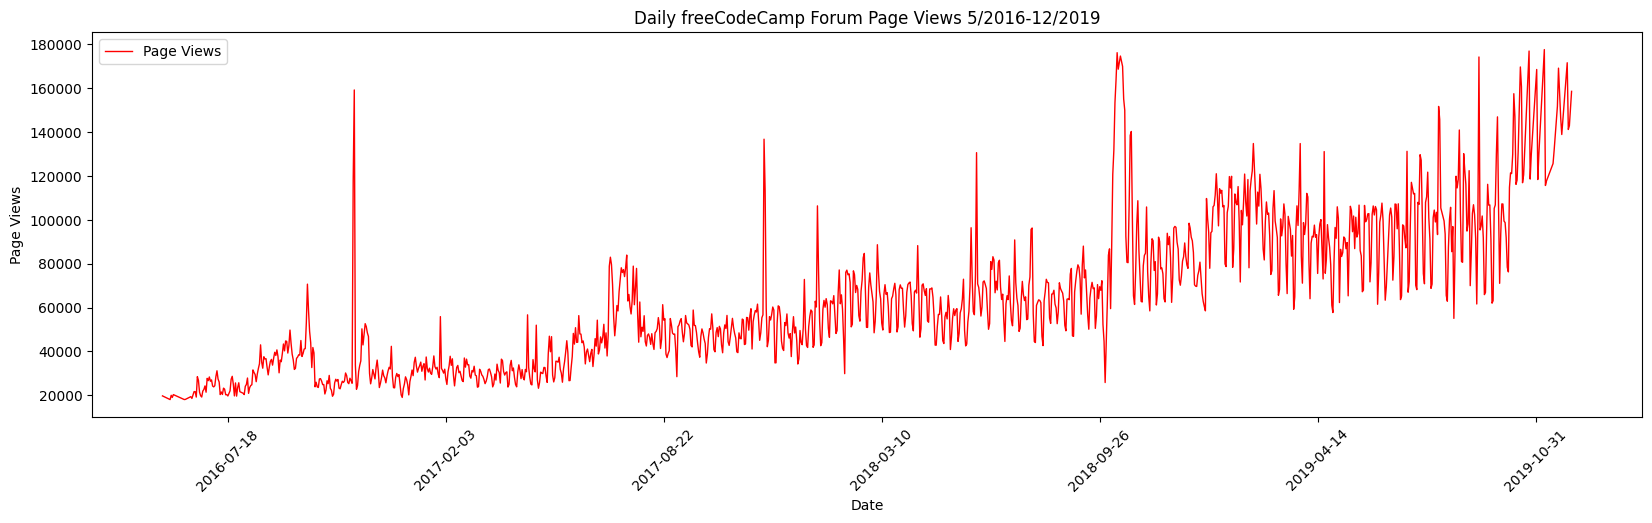

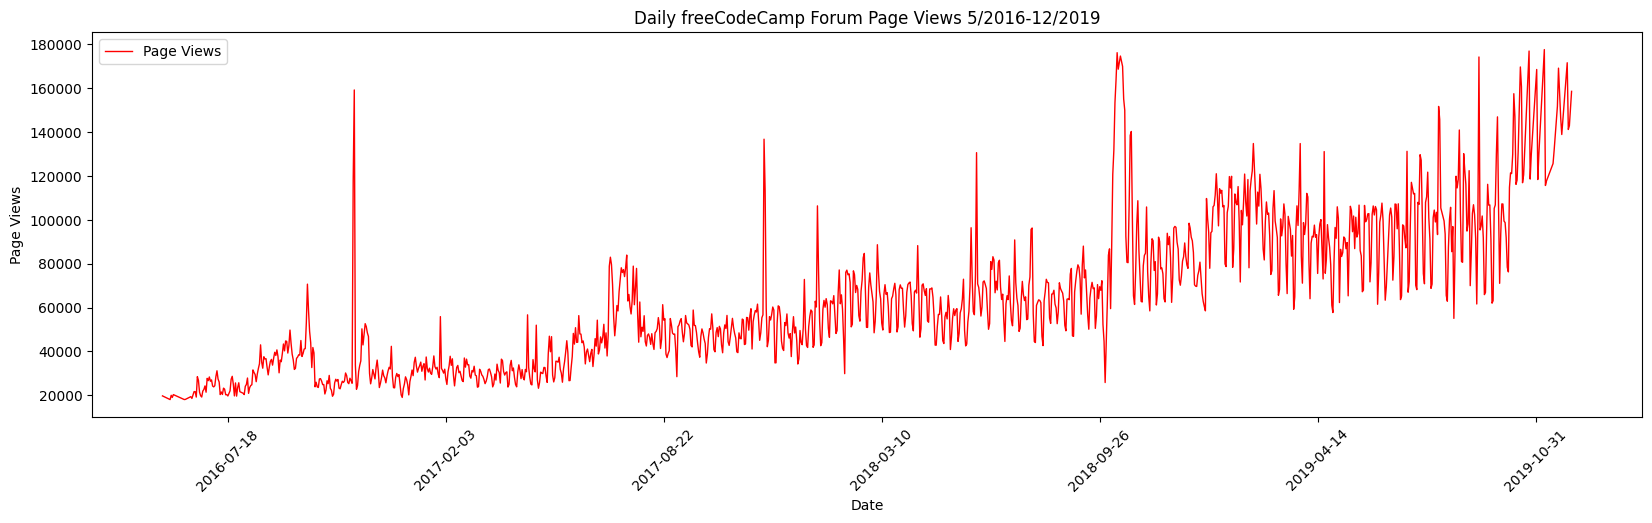

In [8]:
draw_line_plot()

In [9]:
def draw_bar_plot():
  # Copy and modify data for monthly bar plot
  df_bar = df.copy() 
  #extract the year from the date
  df_bar['year'] = df_bar.index.year

  # Converts the month number from date to month name
  df_bar['month'] = df_bar.index.strftime('%B')

  # groups by month and yerar and calculates the average per month
  df_grouped = df_bar.groupby(['year', 'month']).mean()
  
  # Restore idx to draw
  df_grouped = df_grouped.reset_index()
# Draw bar plot
  plt.figure(figsize=(10, 6))
  sns.barplot(x='month', y='value', hue='year', data=df_grouped)
  plt.xticks(rotation=45)
  plt.xlabel('Years')
  plt.ylabel('Average Page Views')
  plt.title('Average Daily Page Views for Each Month Grouped by Year')
  
  # Customize the legend
  plt.legend(title='Months', labels=df_grouped['month'].unique().tolist(), loc='upper left')
  
  plt.tight_layout()
  fig = plt.gcf()
  fig.savefig('bar_plot.png')
  return fig

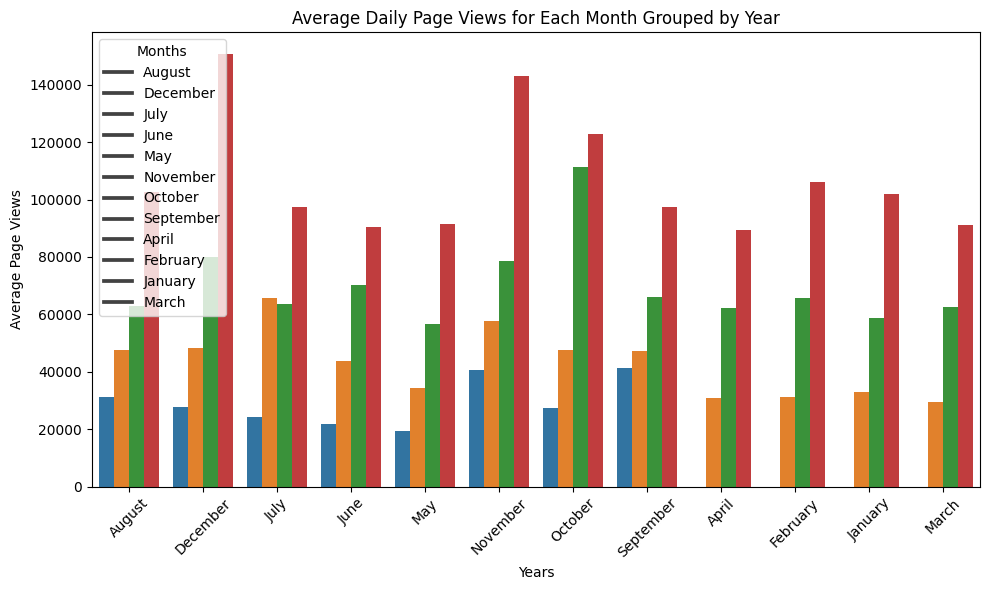

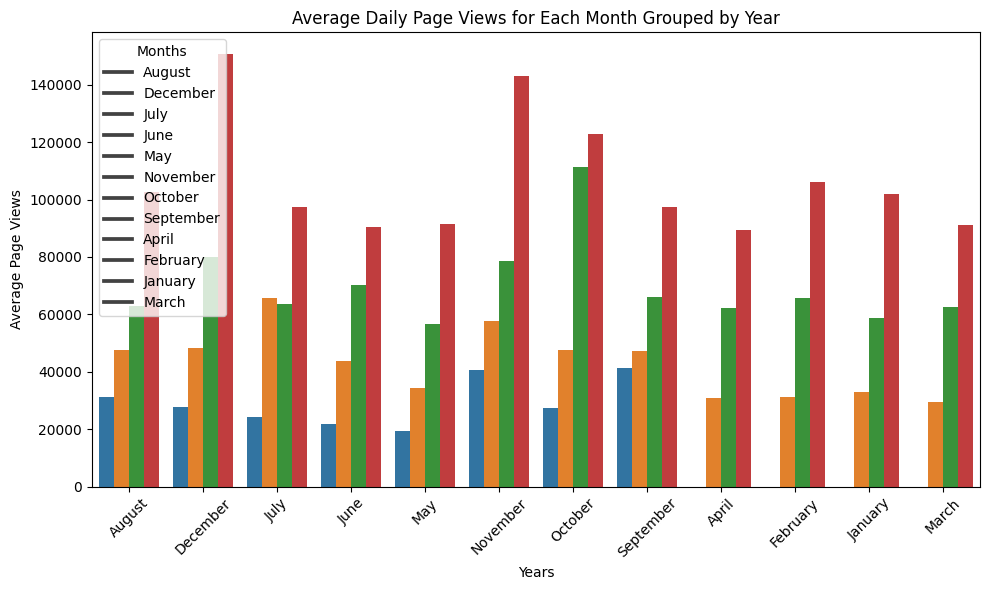

In [10]:
draw_bar_plot()

In [11]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy() 
    df_bar['year'] = df_bar.index.year

    # Convertir fechas a nombres de meses
    df_bar['month'] = df_bar.index.strftime('%B')

    # Realizar la agrupación y calcular la media
    df_grouped = df_bar.groupby(['year', 'month']).mean()

    # Restaurar el índice para el trazado
    df_grouped = df_grouped.reset_index()

    # Dibujar el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x='month', y='value', hue='year', data=df_grouped)
    plt.xticks(rotation=45)
    plt.show()

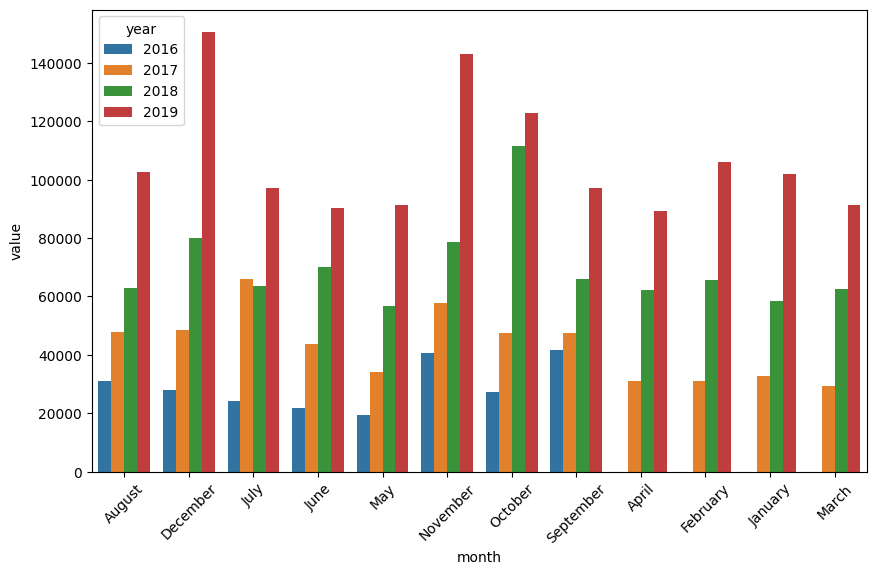

In [12]:
draw_bar_plot()


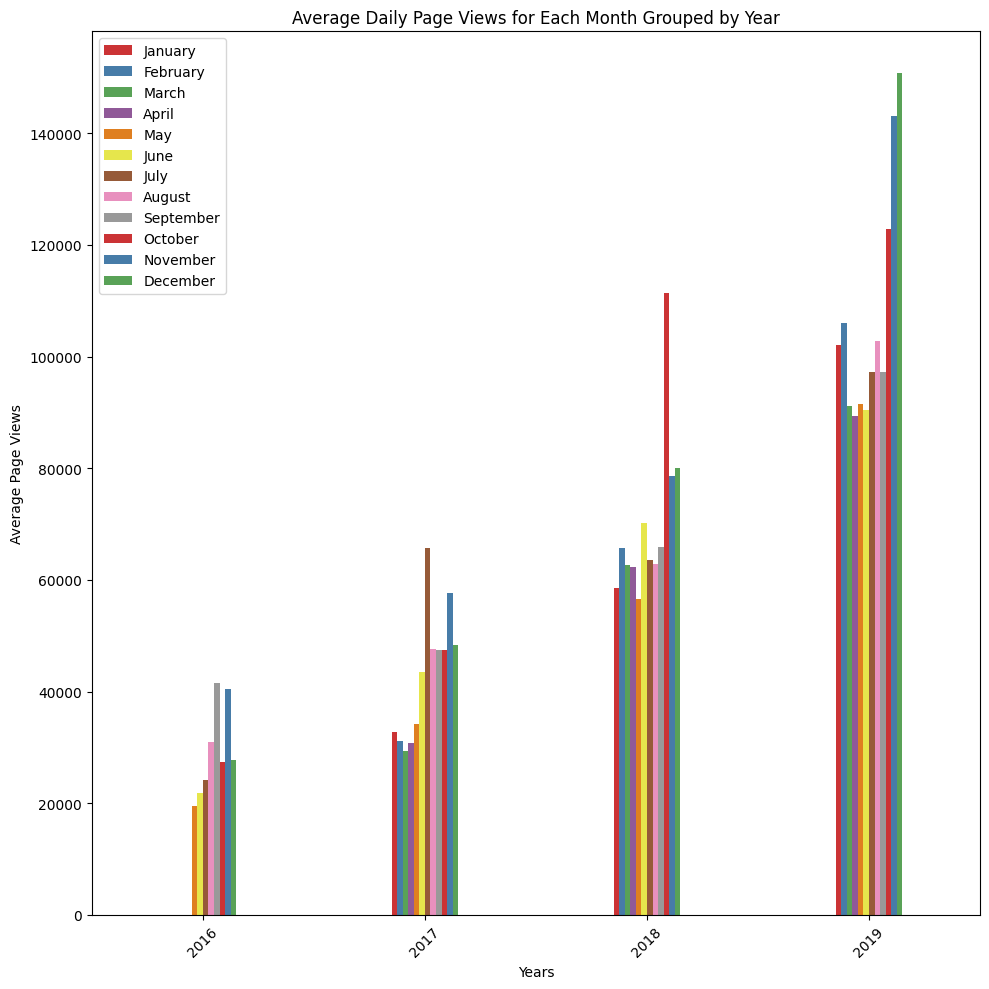

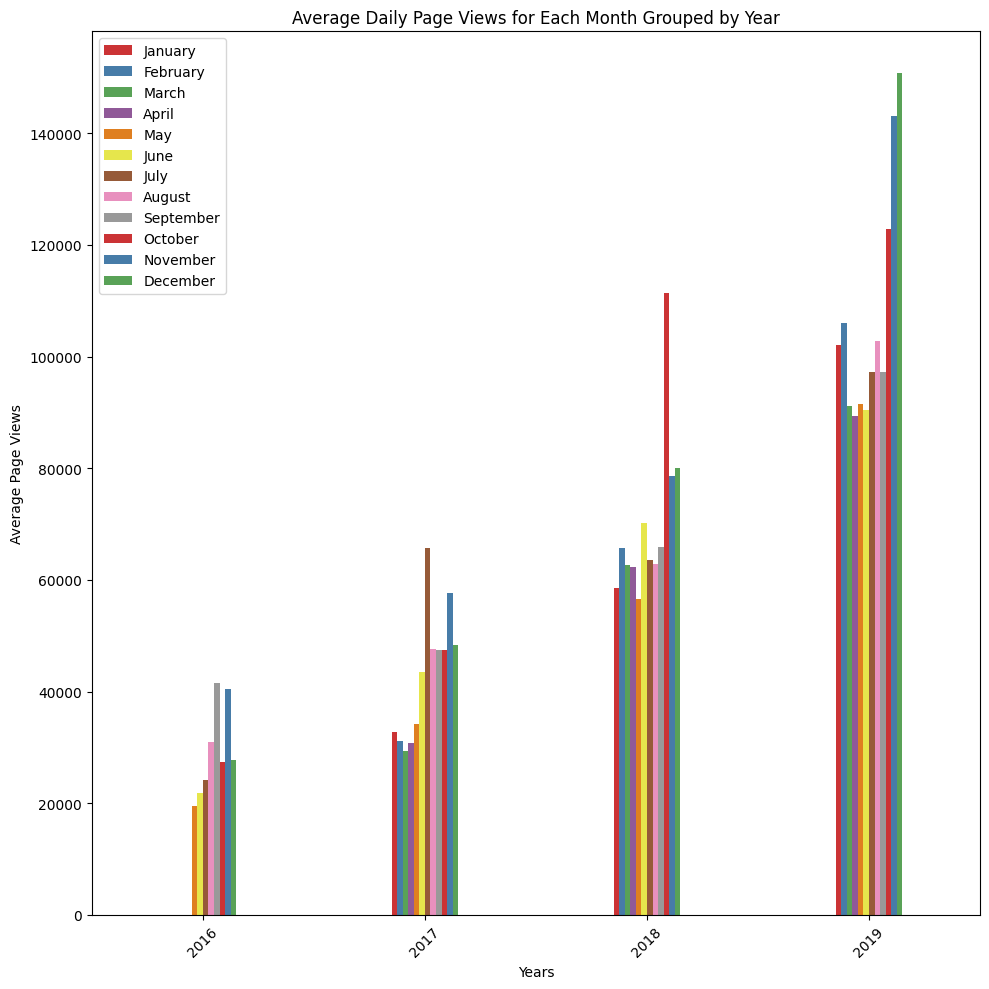

In [49]:
def draw_bar_plot(): 
    df_bar = df.copy() 
    
    # Extract the year from the date and adding that column
    df_bar['year'] = df_bar.index.year

    # Convert the month number from date to month name
    df_bar['month'] = df_bar.index.strftime('%B') #this names the number of month as a streing with its correspondant name
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_bar['month'] = pd.Categorical(df_bar['month'], categories=month_order, ordered=True) #sorting months under the categorical fc from pandas

    # Group by year and month and calculate the average per month
    df_grouped = df_bar.groupby(['year', 'month']).mean()
    
    # Reset index for plotting
    df_grouped = df_grouped.reset_index()
    
    # Draw bar plot
    plt.figure(figsize=(10, 10))

    unique_months = df_grouped['month'].unique()
    sns.barplot(x='year', y='value', hue='month', data=df_grouped, width=0.3, palette=sns.color_palette("Set1", n_colors=len(unique_months)))  # Set palette with unique colors
    plt.xticks(rotation=45)
    plt.xlabel('Years') #naming labels
    plt.ylabel('Average Page Views')
    plt.title('Average Daily Page Views for Each Month Grouped by Year')
    
    # Customize the legend
    plt.legend(loc = 'upper left')
    
    # Save image and return fig (don't change this part)
    plt.tight_layout() # this makes sure that nothing is crashing visually or superposed
    fig = plt.gcf() #get current figure, this gets the object itself that was being made and puts it into fig
    fig.savefig('bar_plot.png') #we name the file of fig as a png.
    return fig #we return it

# Call the function to draw the bar plot and save the figure
draw_bar_plot()

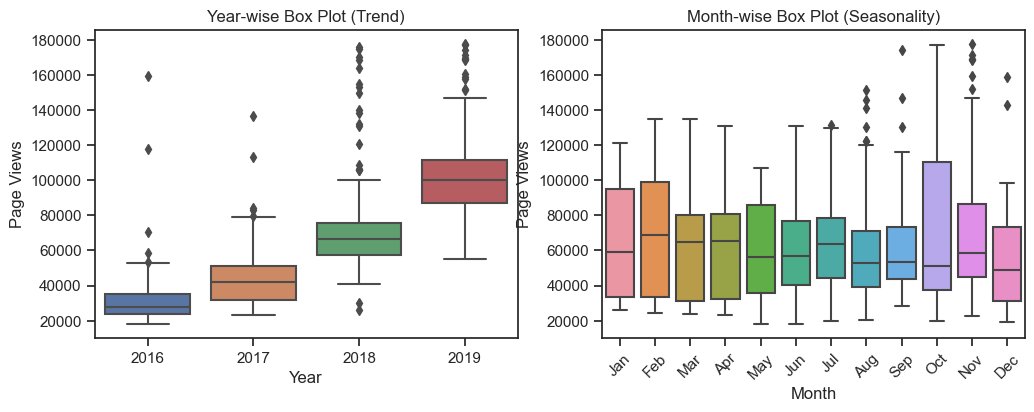

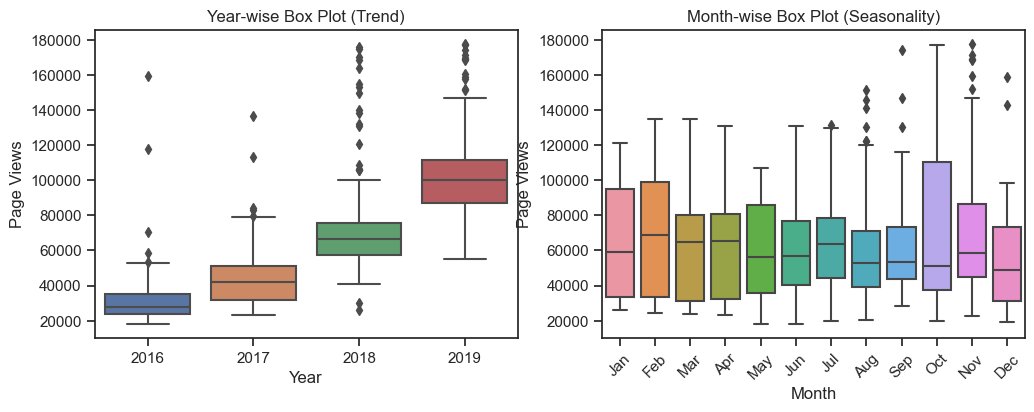

In [63]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]      #this is a way more efficient way of doing what i did before
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # Draw box plots (using Seaborn)
    plt.figure(figsize=(12, 4))

    # Subplot 1: Year-wise Box Plot
    plt.subplot(1, 2, 1) #this means: i'm about to make a 1x2 array of plots, and im currently working on the first one
    sns.set(style='ticks')
    sns.boxplot(x='year', y='value', data= df_box)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')

    # Subplot 2: Month-wise Box Plot
    plt.subplot(1, 2, 2)    #this means: i want to make a 1x2 array of plots, and im currently working on the second one
    sns.set(style='ticks')
    sns.boxplot(x='month', y='value', data= df_box, order=month_order)
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

    # Save image and return fig (don't change this part)
    #plt.tight_layout() lo saque porque asi no salen los cuadritos en el primer grafico
    fig = plt.gcf()

    fig.savefig('box_plot.png')
    return fig
draw_box_plot()

In [52]:
df_box = df.copy()
df_box.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
